In [1]:
import pynm
import numpy as np
import pandas as pd
from pynm.pynm import PyNM
import seaborn as sns

In [2]:
dat = np.load("./data/norm.npz")

In [3]:
ct = dat['fea'][...,0]
ages = dat['age']
sexs = dat['sex']

In [24]:
df = pd.DataFrame()
df['fea'] = ct[:,3]
df['age'] = ages
df['sex'] = sexs
df['group'] = 0

<Axes: xlabel='age', ylabel='fea'>

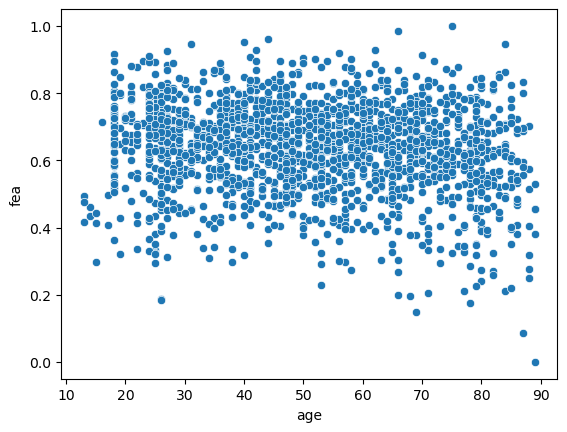

In [25]:
sns.scatterplot(x='age',y='fea',data=df)

In [26]:
m = PyNM(df,'fea','group',confounds = ['age','sex'],bin_spacing=1,bin_width=7)

Models will be fit on full set of controls.


In [27]:
m.gamlss_normative_model(mu = 'fea ~ ps(age*sex)',
                        sigma = '~ ps(age)')

GAMLSS-RS iteration 1: Global Deviance = -1446.066 
GAMLSS-RS iteration 2: Global Deviance = -2130.091 
GAMLSS-RS iteration 3: Global Deviance = -2285.996 
GAMLSS-RS iteration 4: Global Deviance = -2346.983 
GAMLSS-RS iteration 5: Global Deviance = -2376.988 
GAMLSS-RS iteration 6: Global Deviance = -2392.242 
GAMLSS-RS iteration 7: Global Deviance = -2399.814 
GAMLSS-RS iteration 8: Global Deviance = -2403.516 
GAMLSS-RS iteration 9: Global Deviance = -2405.318 
GAMLSS-RS iteration 10: Global Deviance = -2406.186 
GAMLSS-RS iteration 11: Global Deviance = -2406.617 
GAMLSS-RS iteration 12: Global Deviance = -2406.837 
GAMLSS-RS iteration 13: Global Deviance = -2406.953 
GAMLSS-RS iteration 14: Global Deviance = -2407.015 
GAMLSS-RS iteration 15: Global Deviance = -2407.049 
GAMLSS-RS iteration 16: Global Deviance = -2407.067 
GAMLSS-RS iteration 17: Global Deviance = -2407.077 
GAMLSS-RS iteration 18: Global Deviance = -2407.082 
GAMLSS-RS iteration 19: Global Deviance = -2407.084 
GA

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  libraries ‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’ contain no packages

R[write to console]: 2: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  libraries ‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’ contain no packages

R[write to console]: 3: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  libraries ‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’ contain no packages

R[write to console]: 4: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write t

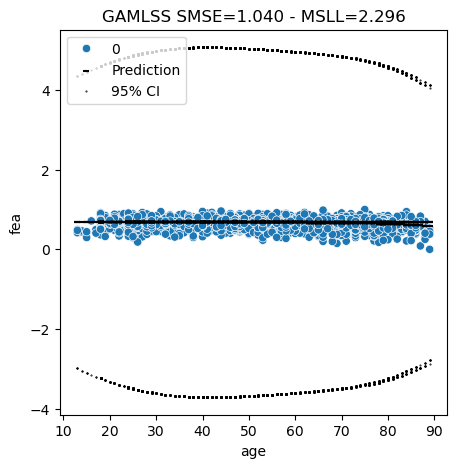

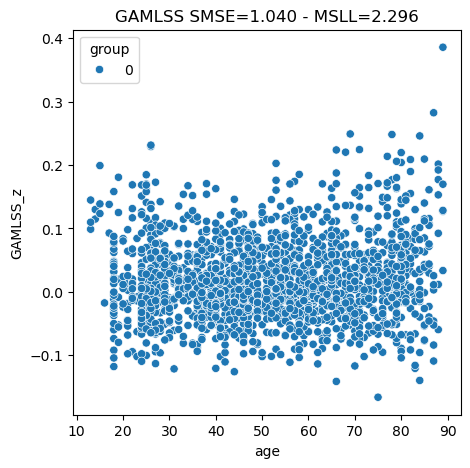

In [28]:
# Plot the data, model prediction, & 95% confidence interval
m.plot()

# Plot the z-scores of the model (model residuals / std deviation)
m.plot_z(confound='age')

In [29]:
m.report()

------
Report
------
========= SMSE - RMSE - MSLL
GAMLSS    1.04   0.14   2.3


In [41]:
m.zm

In [11]:
m.loess_normative_model()
m.gp_normative_model(length_scale_bounds='fixed',length_scale=20)
m.gamlss_normative_model(mu = "fea ~ cs(age)", sigma = "~ cs(age,df=2)", family='NO2')

/home/yyang/miniconda3/lib/python3.12/site-packages/pynm/pynm.py:513: UserWarning: The residuals are not Gaussian!
  warnings.warn("The residuals are not Gaussian!")


GAMLSS-RS iteration 1: Global Deviance = -3974.363 
GAMLSS-RS iteration 2: Global Deviance = -3974.468 
GAMLSS-RS iteration 3: Global Deviance = -3974.467 


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  libraries ‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’ contain no packages

R[write to console]: 2: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  libraries ‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’ contain no packages

R[write to console]: 3: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  libraries ‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’ contain no packages

R[write to console]: 4: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write t

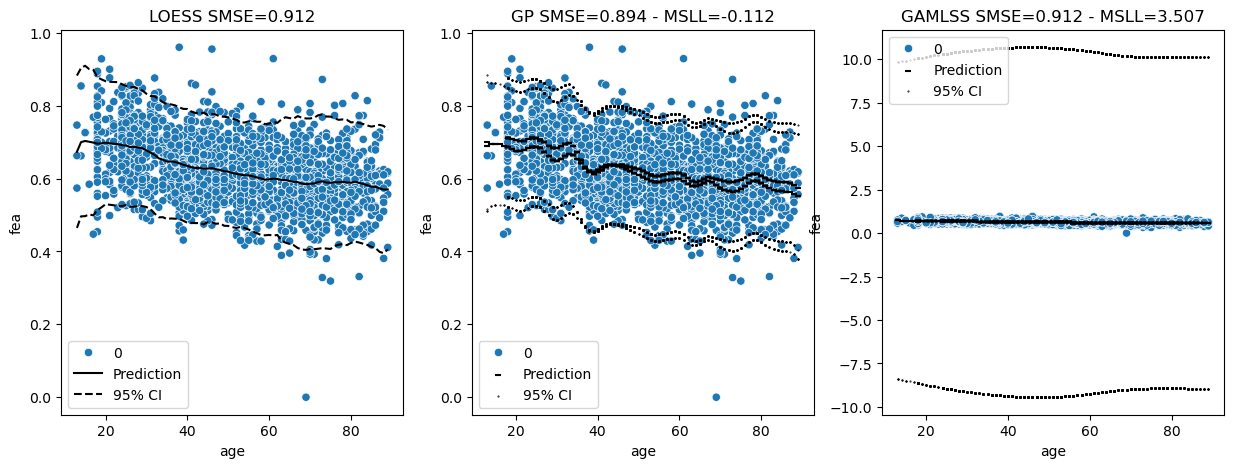

/home/yyang/miniconda3/lib/python3.12/site-packages/pynm/pynm.py:1047: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''])
/home/yyang/miniconda3/lib/python3.12/site-packages/pynm/pynm.py:1047: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''])
/home/yyang/miniconda3/lib/python3.12/site-packages/pynm/pynm.py:1047: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''])


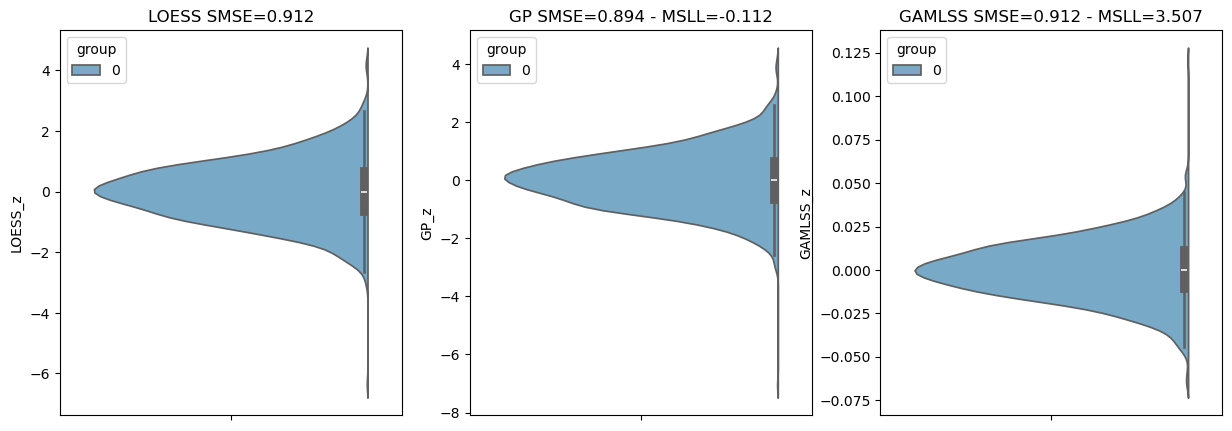

In [12]:
m.plot()
m.plot_z()

In [28]:
m.loess_normative_model()
m.centiles_normative_model()
m.gp_normative_model()

/home/yyang/miniconda3/lib/python3.12/site-packages/pynm/pynm.py:513: UserWarning: The residuals are not Gaussian!
  warnings.warn("The residuals are not Gaussian!")


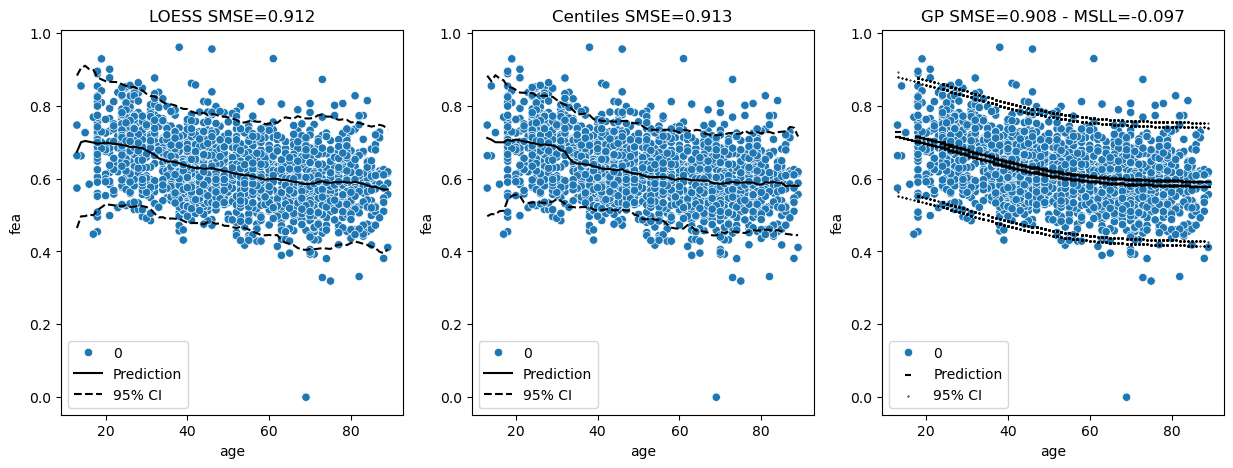

/home/yyang/miniconda3/lib/python3.12/site-packages/pynm/pynm.py:1047: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''])
/home/yyang/miniconda3/lib/python3.12/site-packages/pynm/pynm.py:1047: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''])
/home/yyang/miniconda3/lib/python3.12/site-packages/pynm/pynm.py:1047: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''])


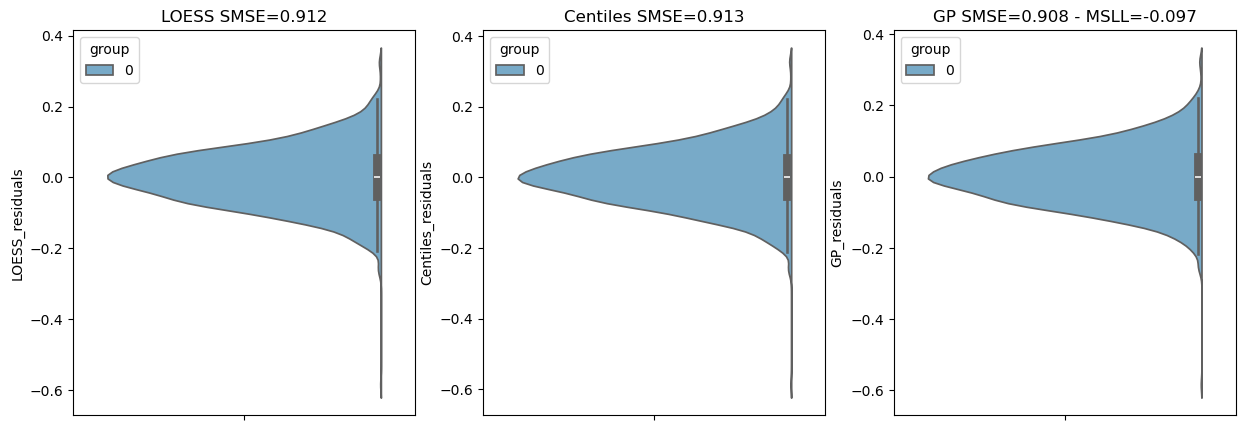

/home/yyang/miniconda3/lib/python3.12/site-packages/pynm/pynm.py:1047: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''])
/home/yyang/miniconda3/lib/python3.12/site-packages/pynm/pynm.py:1047: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''])
/home/yyang/miniconda3/lib/python3.12/site-packages/pynm/pynm.py:1047: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''])


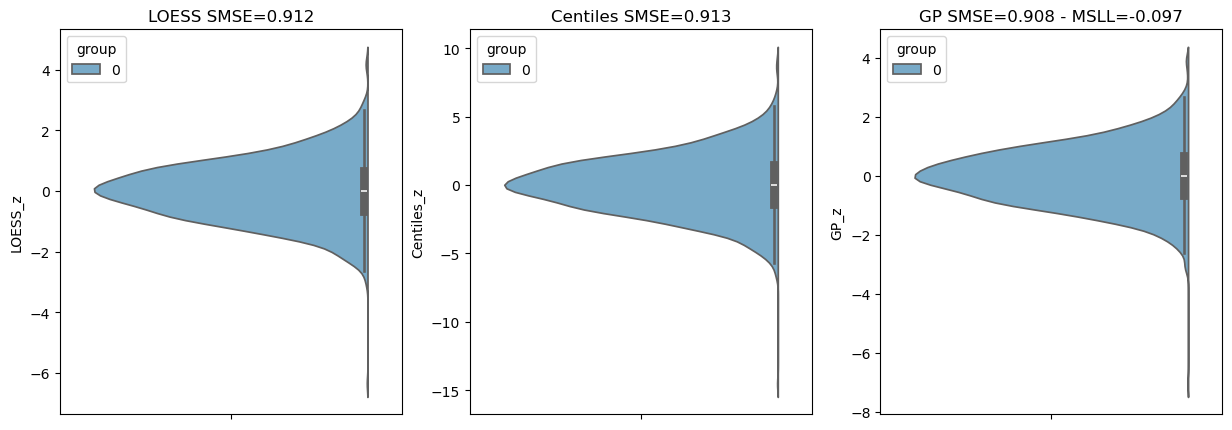

In [29]:
# Plot the data, model prediction, & 95% confidence interval
m.plot()

# Plot the residuals of the model (actual value - predicted value)
m.plot_res()

# Plot the z-scores of the model (model residuals / std deviation)
m.plot_z()